In [736]:
import pandas as pd
Data=pd.read_csv(r"C:\Users\Tausif Ansari\Downloads\netflix_titles.csv")
df1=Data.copy()

## Section 1: Data Cleaning & Understanding

In [737]:
df1[df1['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [738]:
df1['duration']=df1['duration'].where(~(df1['duration'].isna()),'90 min')

In [739]:
df1['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [740]:
df1.fillna({'rating':'PG-13'},inplace=True)

In [741]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### 1. How many movies and TV shows are there in total?

In [742]:
import re
def regfun(text):
    pat=re.compile(r'TV|Movies|Documentaries|Thrillers|Musicals|Adventure|Anime|Stand-Up',re.IGNORECASE)
    res=re.search(pat,text)
    if res:
        if res.group() in ('TV','Stand-Up'):
            return 'TV Show'
        elif res.group() in ('Thrillers','Movies','Musicals','Documentaries','Adventure','Anime'):
            return 'Movies'
            
df1['TV_Movie']=df1['listed_in'].apply(regfun)
df1.fillna({'TV_Movie':'TV Show'},inplace=True)

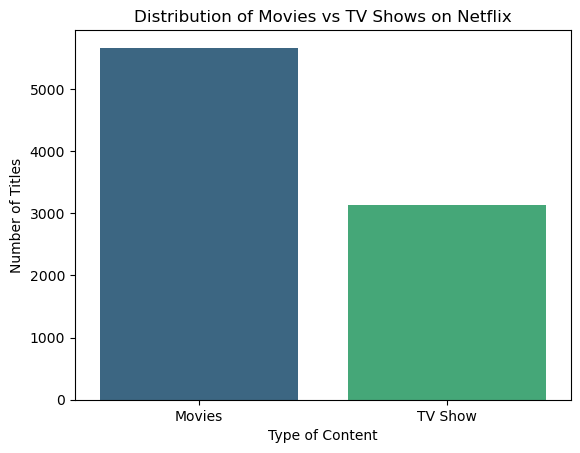

In [743]:
import matplotlib.pyplot as plt
import seaborn as sns

Movie_Show=df1['TV_Movie'].value_counts()
data=pd.DataFrame({'Type':list(Movie_Show.index),'Value':list(Movie_Show.iloc[:])})

sns.barplot(x='Type',hue='Type', y='Value',data=data, palette='viridis')

plt.title('Distribution of Movies vs TV Shows on Netflix')
plt.xlabel('Type of Content')
plt.ylabel('Number of Titles')
plt.show()


### 2. How many missing values are there in each column?

In [744]:
for df in df1:
    print(df1[df].value_counts())
    print("-"*50)
    

show_id
s1       1
s5875    1
s5869    1
s5870    1
s5871    1
        ..
s2931    1
s2930    1
s2929    1
s2928    1
s8807    1
Name: count, Length: 8807, dtype: int64
--------------------------------------------------
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
--------------------------------------------------
title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64
--------------------------------------------------
director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy 

### 3. Which columns have the highest percentage of missing data?

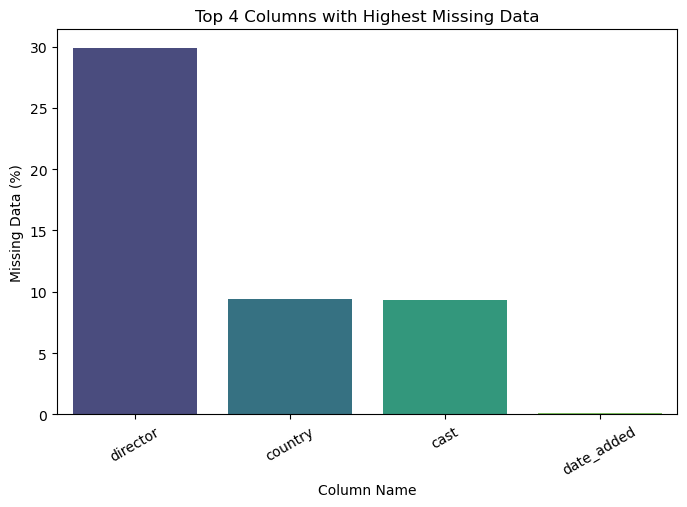

In [745]:
import matplotlib.pyplot as plt
import seaborn as sns
sort=(df1.isna().sum()/len(df1))*100
sortad=sort.reset_index().rename(columns={'index':'Column_Name',0:'Missing%'}).sort_values(by='Missing%',ascending=False,ignore_index=True).head(4)

plt.figure(figsize=(8,5))
sns.barplot(x='Column_Name', hue='Column_Name',y='Missing%', data=sortad, palette='viridis')

plt.title('Top 4 Columns with Highest Missing Data')
plt.xlabel('Column Name')
plt.ylabel('Missing Data (%)')
plt.xticks(rotation=30)
plt.show()

### 4.How many unique countries, directors, and ratings are present?

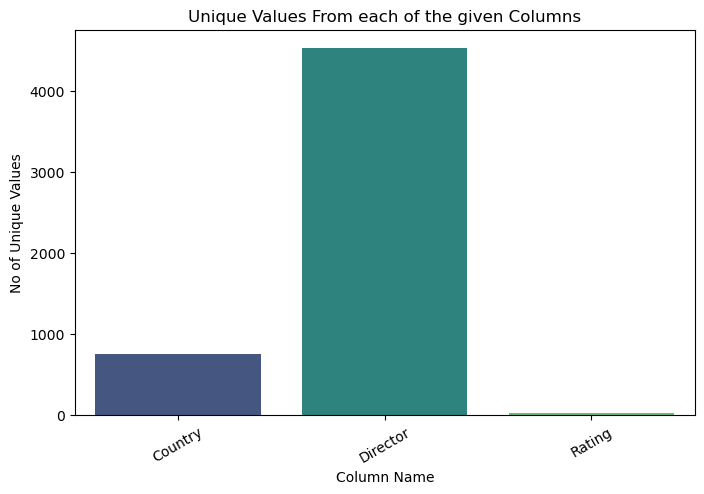

In [746]:
import matplotlib.pyplot as plt
import seaborn as sns
Country=df1['country'].nunique()
Director=df1['director'].nunique()
Rating=df1['rating'].nunique()
Data=pd.DataFrame({'Column_Name':['Country','Director','Rating'],'Value':[Country,Director,Rating]})

plt.figure(figsize=(8,5))
sns.barplot(x='Column_Name', hue='Column_Name',y='Value', data=Data, palette='viridis')

plt.title('Unique Values From each of the given Columns')
plt.xlabel('Column Name')
plt.ylabel('No of Unique Values')
plt.xticks(rotation=30)
plt.show()

# 🔹 Content Type Analysis
### 5. What is the percentage distribution of Movies vs TV Shows?

In [749]:
Movie_Show=df1['TV_Movie'].value_counts()
Movie_Show.iloc[:]/Movie_Show.sum()*100

TV_Movie
Movies     64.335188
TV Show    35.664812
Name: count, dtype: float64

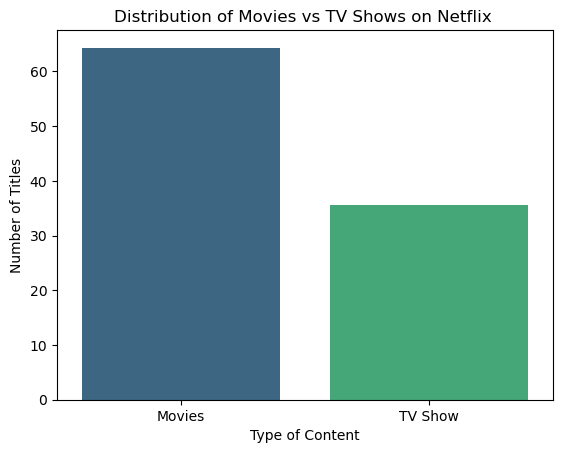

In [751]:
import matplotlib.pyplot as plt
import seaborn as sns

Movie_Show=df1['TV_Movie'].value_counts()
Movie_Show=Movie_Show.iloc[:]/Movie_Show.sum()*100
data=pd.DataFrame({'Type':list(Movie_Show.index),'Value':list(Movie_Show.iloc[:])})

sns.barplot(x='Type',hue='Type', y='Value',data=data, palette='viridis')

plt.title('Distribution of Movies vs TV Shows on Netflix ')
plt.xlabel('Type of Content')
plt.ylabel('Number of Titles')
plt.show()

### 6. Which country produces the most Netflix content?

In [240]:
Data

,country,count
0,United States,3649
1,India,972
2,United Kingdom,419
3,Japan,245
4,South Korea,199


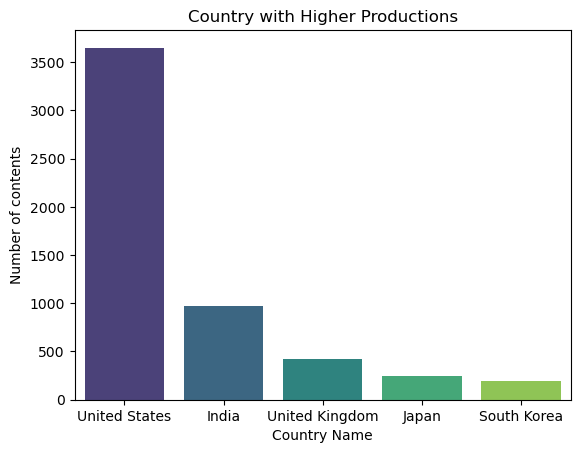

In [752]:
import matplotlib.pyplot as plt
import seaborn as sns
df1.fillna({'country':'United States'},inplace=True)
Data=df1['country'].value_counts().reset_index().sort_values(by='count',ascending=False,ignore_index=False).head(5)

sns.barplot(x='country',hue='country', y='count',data=Data, palette='viridis')

plt.title('Country with Higher Productions')
plt.xlabel('Country Name')
plt.ylabel('Number of contents')
plt.show()


### 7.What are the top 10 countries contributing the most to Netflix content?

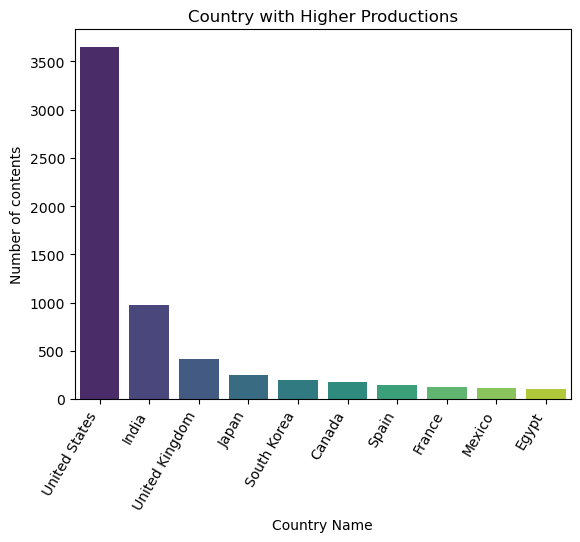

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

Data=df1['country'].value_counts().reset_index().head(10)
sns.barplot(x='country',hue='country', y='count',data=Data, palette='viridis')

plt.title('Country with Higher Productions')
plt.xticks(rotation=60,ha='right')
plt.xlabel('Country Name')
plt.ylabel('Number of contents')
plt.show()

### 8. Which director has directed the most titles on Netflix?

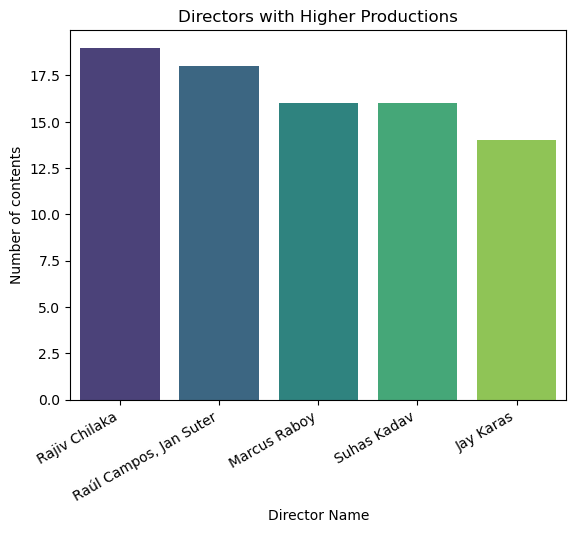

In [754]:
import matplotlib.pyplot as plt
import seaborn as sns
Data=df1['director'].value_counts().reset_index().head()

sns.barplot(x='director',hue='director', y='count',data=Data, palette='viridis')

plt.title('Directors with Higher Productions')
plt.xticks(rotation=30,ha='right')
plt.xlabel('Director Name')
plt.ylabel('Number of contents')
plt.show()

### 9. Which actors appear most frequently across titles?

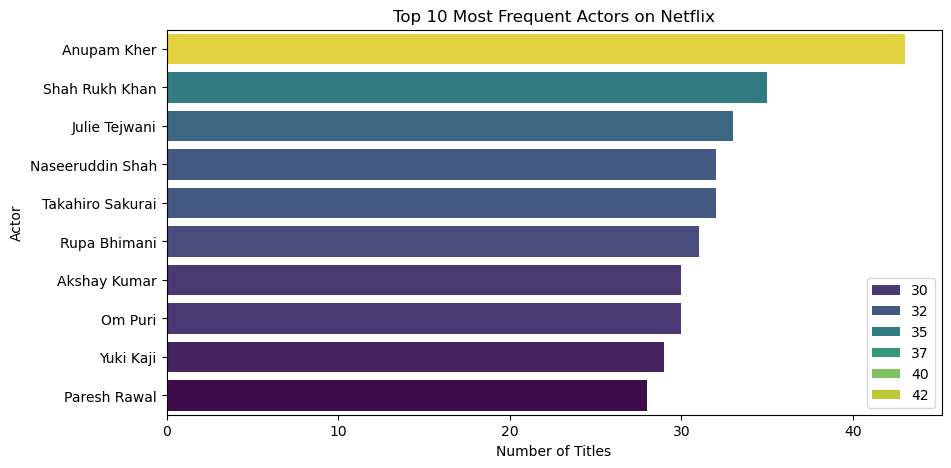

In [755]:
import seaborn as sns
import matplotlib.pyplot as plt
df_cast = df1.dropna(subset=['cast'])
actors = (df_cast['cast'].str.split(',').explode().str.strip())
top_actors = actors.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_actors.values,hue=top_actors.values, y=top_actors.index, palette='viridis')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()


# 🔹 Time-Based Insights
### 10.In which year were the most titles released?

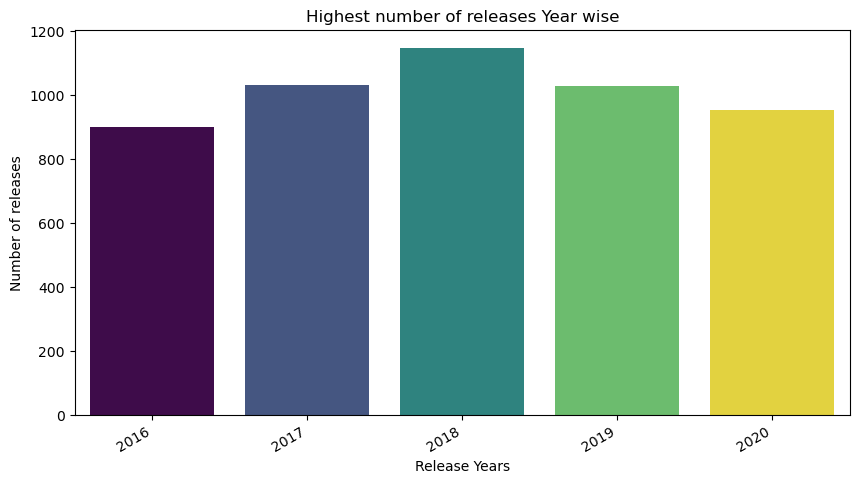

In [756]:
import seaborn as sns
import matplotlib.pyplot as plt
Year=pd.to_datetime(df1['release_year'],format="%Y").dt.year
Data=Year.value_counts().head(5).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='release_year',hue='release_year', y='count',data=Data, palette='viridis',legend=False)
plt.title('Highest number of releases Year wise')
plt.xticks(rotation=30,ha='right')
plt.xlabel('Release Years')
plt.ylabel("Number of releases")
plt.show()

### 11. In which year were the most titles added to Netflix?

In [762]:
df1['date_added'].ffill(inplace=True)
Dates=df1['date_added'].str.strip().str.split(",")
Months = Dates.apply(lambda x: ",".join(x[0].strip().split(" ") + [x[1].strip()] if len(x) > 1 else x[0].split(" ")))
df1['date_added']=pd.to_datetime(Months,format='%B,%d,%Y')

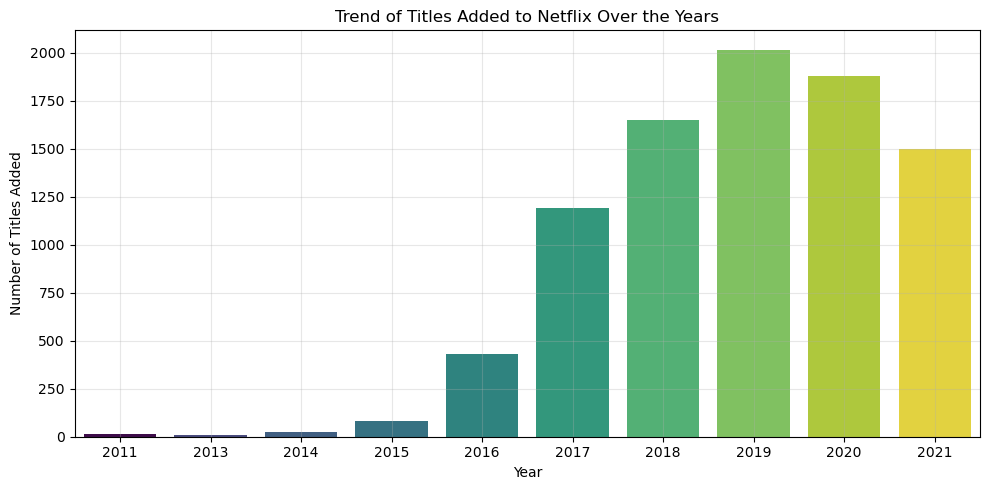

In [758]:
import seaborn as sns
import matplotlib.pyplot as plt
Data=df1['date_added'].dt.year.value_counts().reset_index().head(10)
Data.columns=['year','count']


plt.figure(figsize=(10,5))
sns.barplot(y='count',x='year',hue='year',data=Data, palette='viridis',legend=False)
plt.title('Trend of Titles Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 12.Is there a trend over time — are more titles being added each year?

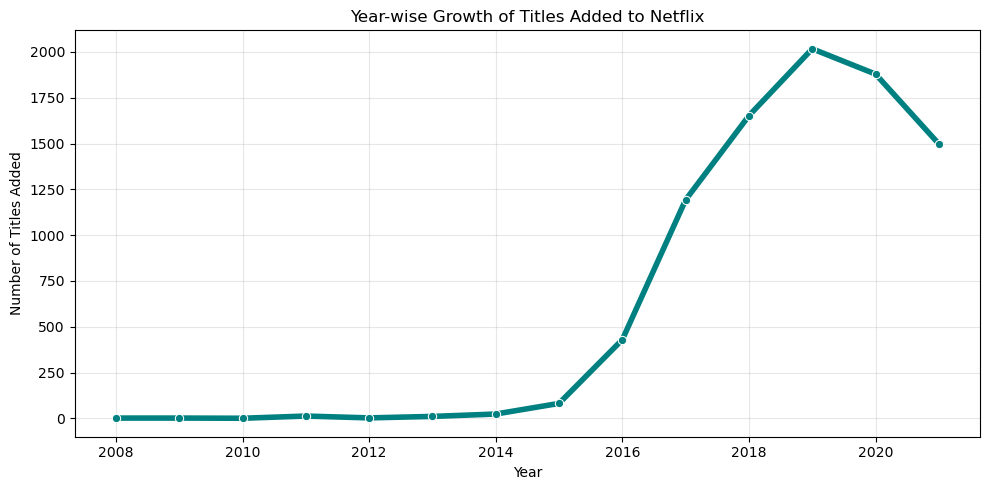

In [763]:
Data=df1['date_added'].dt.year.value_counts().reset_index().sort_values(by='date_added',ascending=False,ignore_index=True)
Data.columns=['Years','Content']

plt.figure(figsize=(10,5))
sns.lineplot(x='Years', y='Content', data=Data, marker='o', linewidth=4, color='teal',)
plt.title('Year-wise Growth of Titles Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 13. Which month tends to have the most content added?

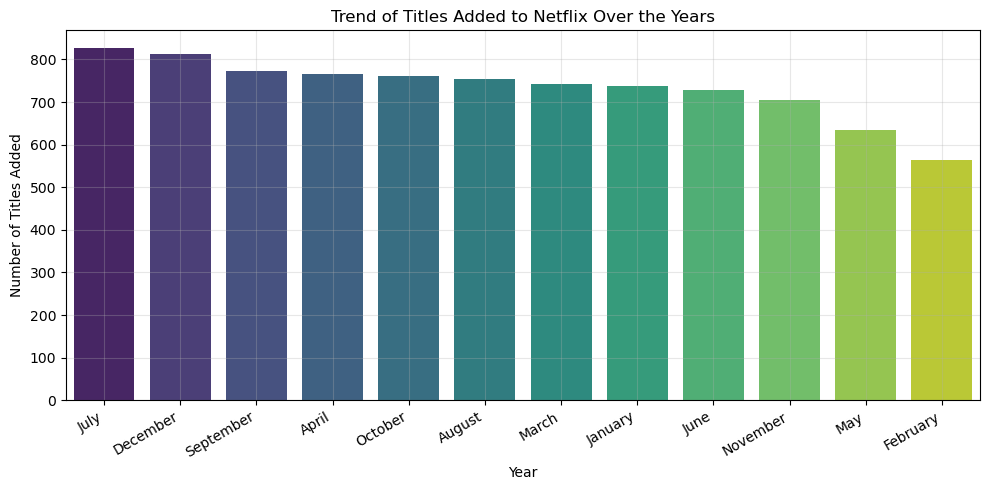

In [765]:
Months=df1['date_added'].dt.month_name()
Months=Months.value_counts().reset_index()
Months.columns=['Months','Content']

plt.figure(figsize=(10,5))
sns.barplot(y='Content',x='Months',hue='Months',data=Months, palette='viridis',legend=False)
plt.title('Trend of Titles Added to Netflix Over the Years')
plt.xticks(rotation=30,ha='right')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 14. How long (in years) does it typically take between release_year and date_added?

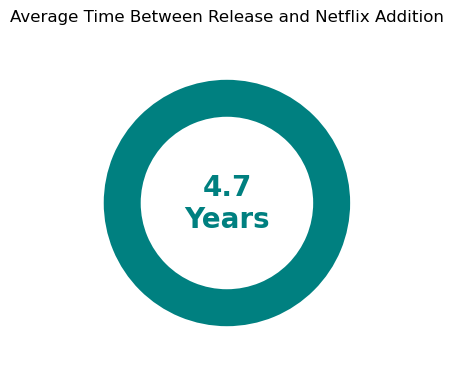

In [769]:
import matplotlib.pyplot as plt
df1['added_year']=df1['date_added'].dt.year

# Compute average delay
Time_year = (df1['added_year'] - df1['release_year']).mean()

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(aspect="equal"))
ax.pie([1], colors=["teal"], radius=1, wedgeprops=dict(width=0.3))
plt.text(0, 0, f"{Time_year:.1f}\nYears", 
         ha='center', va='center', fontsize=20, weight='bold', color='teal')

plt.title("Average Time Between Release and Netflix Addition", pad=20)
plt.show()


# 🔹 Genre and Category Insights
### 15. What are the most common genres (based on the listed_in column)?

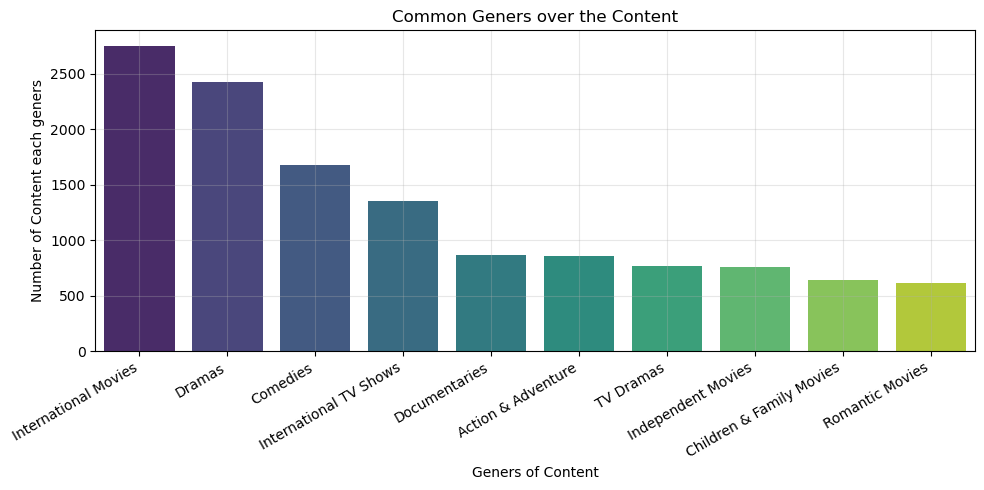

In [770]:
import seaborn as sns
import matplotlib.pyplot as plt
goners=df1['listed_in'].str.split(",").explode().str.strip().value_counts().reset_index().head(10)
goners.columns=['Geners','count']

plt.figure(figsize=(10,5))
sns.barplot(y='count',x='Geners',hue='Geners',data=goners, palette='viridis',legend=False)
plt.title('Common Geners over the Content')
plt.xticks(rotation=30,ha='right')
plt.xlabel('Geners of Content')
plt.ylabel('Number of Content each geners')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 16. How do genres vary between Movies and TV Shows?

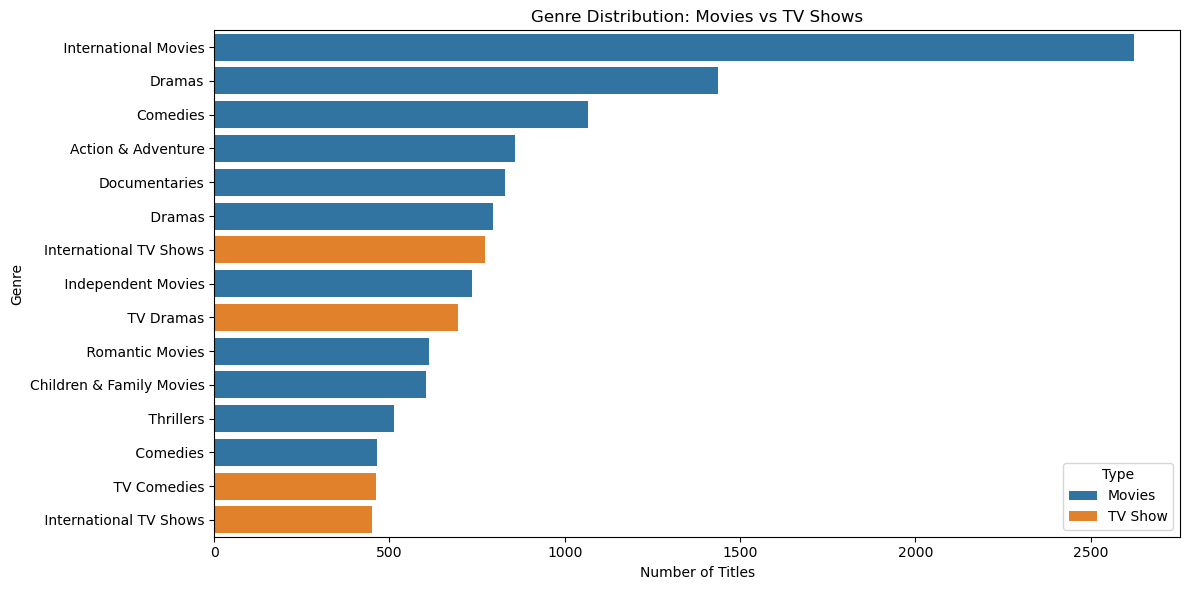

In [771]:
gd1=df1[df1['TV_Movie'].eq('Movies')]['listed_in'].str.split(",")
gd1_mov=df1['TV_Movie'][df1['TV_Movie'].eq('Movies')]
df_TV=pd.DataFrame({'Movie_Series':gd1_mov,'Geners':gd1})
df_TV=df_TV.explode('Geners')
gd2=df1[df1['TV_Movie'].ne('Movies')]['listed_in'].str.split(",")
gd2_show=df1['TV_Movie'][df1['TV_Movie'].ne('Movies')]
df_show=pd.DataFrame({'Movie_Series':gd2_show,'Geners':gd2})
df_show.explode('Geners')
new_Data=pd.concat([df_TV,df_show]).explode('Geners')
new_Gda=new_Data.groupby(['Movie_Series','Geners']).size().reset_index(name='Count').sort_values(by='Count',ascending=False,ignore_index=True).head(15)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='Count', y='Geners', hue='Movie_Series', data=new_Gda)
plt.title('Genre Distribution: Movies vs TV Shows')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Type')
plt.tight_layout()
plt.show()


### 17. Which genres are most popular in specific countries (like the US, India, UK)?

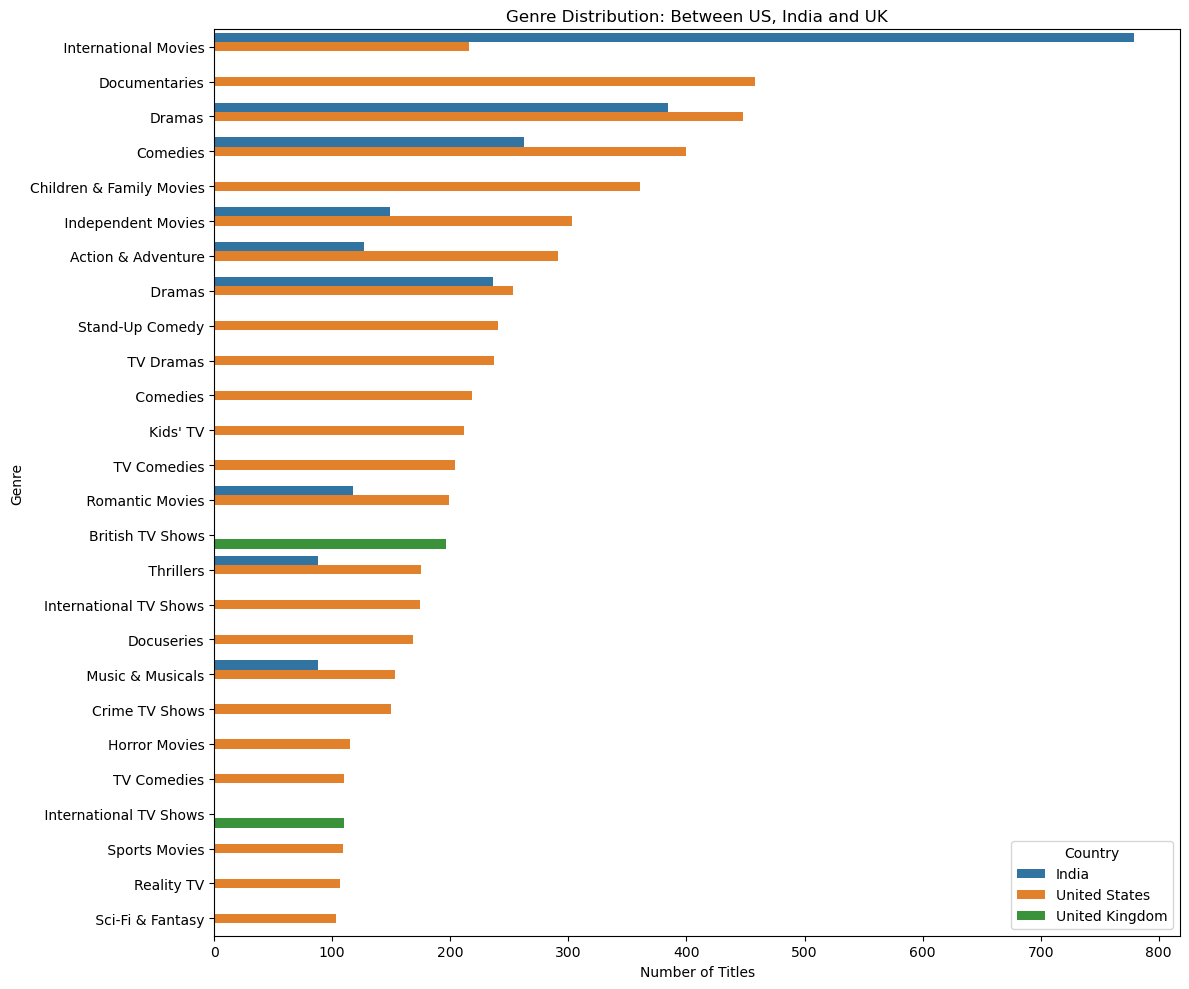

In [773]:
df1['country'].ffill()
my_data=df1.loc[df1['country'].isin(['United States','India','United Kingdom'])][['country','listed_in']]
my_data['listed_in']=my_data['listed_in'].str.split(",")
done_data=my_data.explode('listed_in').explode('listed_in')
done_my=done_data.groupby(['country','listed_in']).size().reset_index(name='Count').sort_values(by='Count',ascending=False,ignore_index=True).head(35)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # make figure taller for better spacing
sns.barplot(x='Count', y='listed_in', hue='country', data=done_my,dodge=True)
plt.title('Genre Distribution: Between US, India and UK')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.legend(title='Country')
plt.tight_layout()
plt.show()


### 18. What are the most common combinations of genres?

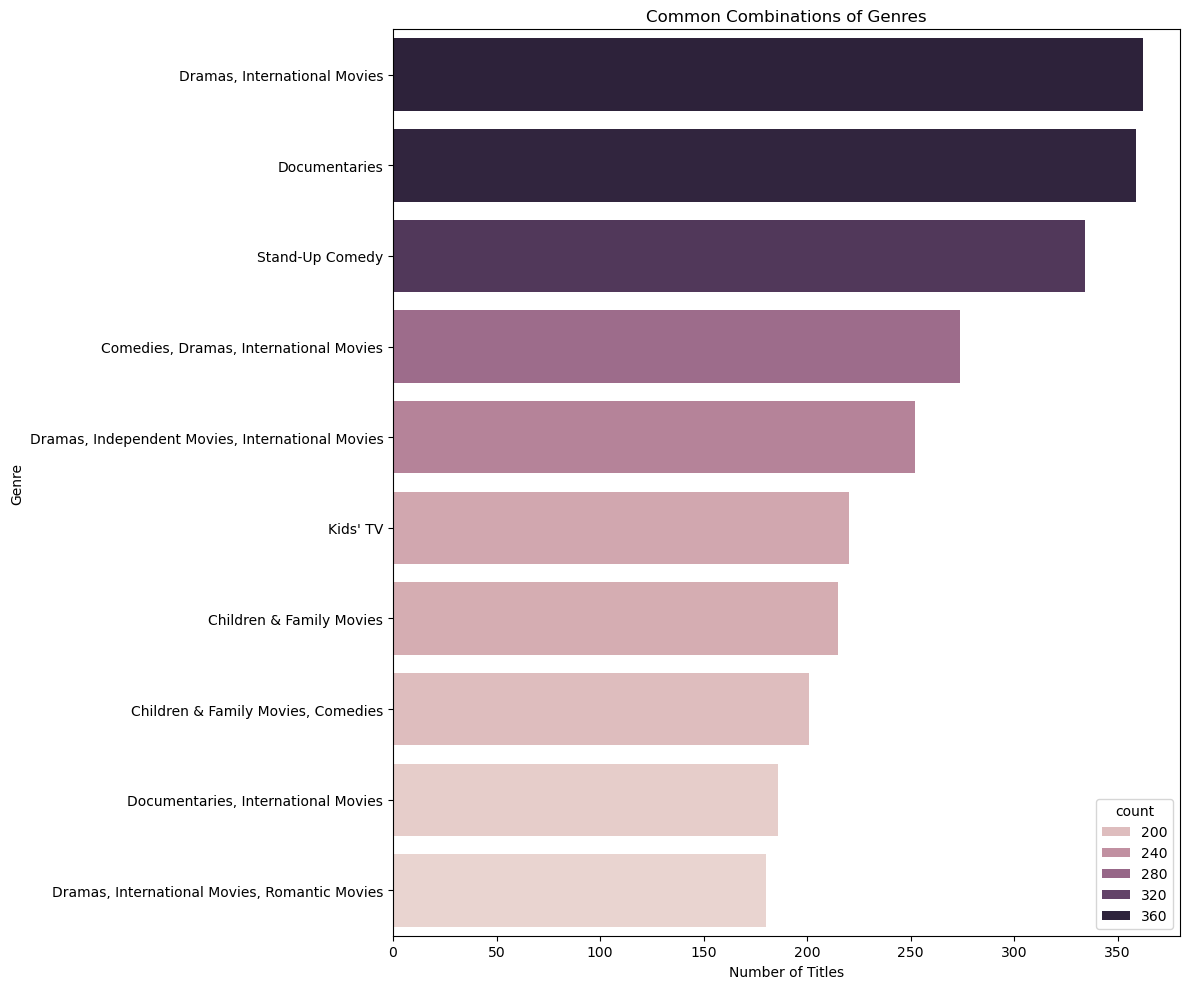

In [652]:
Data=df1['listed_in'].value_counts().reset_index().sort_values(by='count',ascending=False,ignore_index=True).head(10)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # taller figure
sns.barplot(x='count',y='listed_in', hue='count',data=Data,dodge=False)
plt.title('Common Combinations of Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


# 🔹 Duration and Rating Analysis
### 19. What are the most common ratings (like TV-MA, PG-13, etc.)?

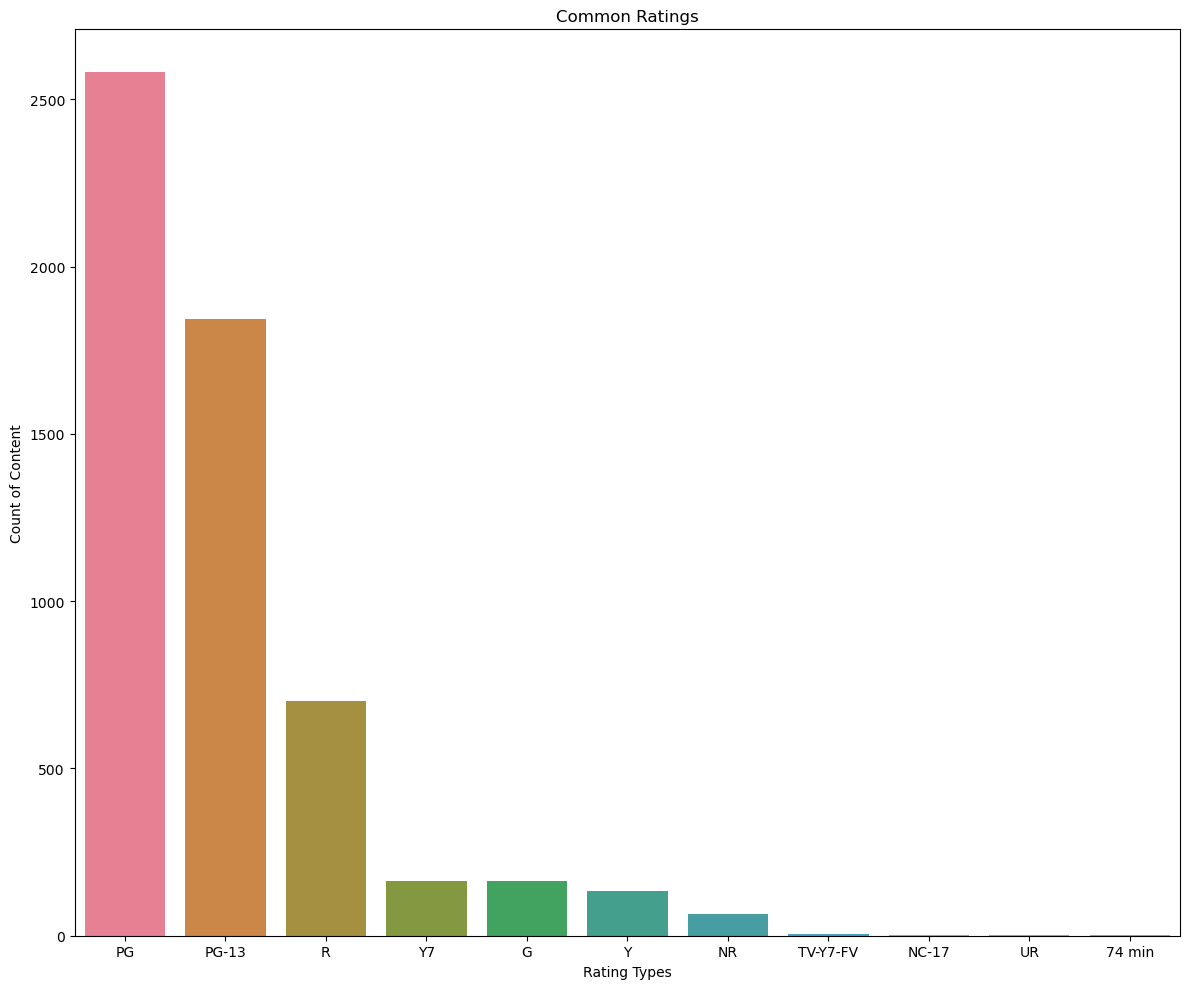

In [669]:
Data=df1[df1['TV_Movie'].eq('Movies')].replace({'rating':{'TV-MA':'PG','TV-14':'PG-13','TV-PG':'PG','TV-Y':'Y','TV-G':'G','TV-Y7':'Y7'}})
my_data=Data['rating'].value_counts().reset_index().head(11)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))  # taller figure
sns.barplot(x='rating',y='count', hue='rating',data=my_data,dodge=False)
plt.title('Common Ratings')
plt.xlabel('Rating Types')
plt.ylabel('Count of Content')
plt.tight_layout()
plt.show()

### 20.How does the distribution of ratings differ between Movies and TV Shows?

In [701]:
df1.loc[df1['TV_Movie']=='Movies', 'rating'] = df1.loc[df1['TV_Movie']=='Movies', 'rating'].replace({
    'TV-MA':'PG',
    'TV-14':'PG-13',
    'TV-PG':'PG',
    'TV-Y':'Y',
    'TV-G':'G',
    'TV-Y7':'Y7'
})


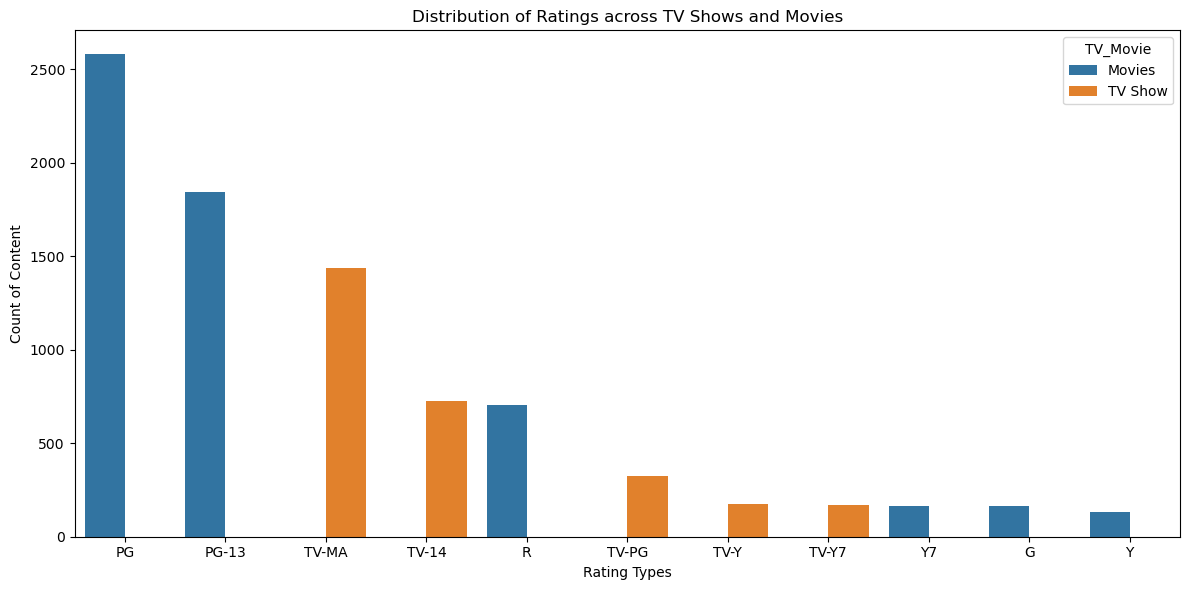

In [702]:
my_Data=df1.groupby(['TV_Movie','rating']).size().reset_index(name='Count').sort_values(by='Count',ascending=False,ignore_index=True).head(11)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='rating', y='Count',hue='TV_Movie', data=my_Data,dodge=True)
plt.title('Distribution of Ratings across TV Shows and Movies')
plt.xlabel('Rating Types')
plt.ylabel('Count of Content')
plt.tight_layout()
plt.show()

### 21.What is the average duration of movies?

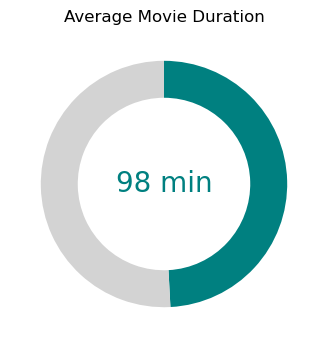

In [733]:
import numpy as np
import matplotlib.pyplot as plt
duration=df1.loc[df1['TV_Movie'].eq('Movies')]['duration']
duration=duration.str.extract(r'(\d+)').astype(np.int16)
mean_duration = duration.mean()[0]

fig, ax = plt.subplots(figsize=(4,4), subplot_kw=dict(aspect="equal"))

# Donut chart showing the mean
ax.pie([mean_duration, 200 - mean_duration], colors=['teal', 'lightgray'], startangle=90, counterclock=False,wedgeprops=dict(width=0.3))

# Add the value in the center
plt.text(0, 0, f"{int(mean_duration)} min", ha='center', va='center', fontsize=20, color='teal')
plt.title("Average Movie Duration")
plt.show()

# duration=duration.str[:2]

### 22.For TV shows, what is the average number of seasons?

### 23.Are there any outliers or strange values in the duration column (e.g., missing units or mixed formats)?